In [4]:
import numpy as np
from astropy.utils.data import download_file
from spectral_cube import SpectralCube
from astropy import wcs

In [5]:
# keep an interactive handle to the plot windows until they are switched off
%matplotlib widget
import pylab as pl
# set so that these display properly on black backgrounds
pl.rcParams['figure.facecolor']='w'

In [6]:
import radio_beam

In [7]:
from astropy import units as u

In [141]:
filename2 = '/orange/adamginsburg/salt/s255ir/imaging/S255IR-SMA1_sci.spw2.cube.I.zoom.manual.image.pbcor'

In [142]:
cube = SpectralCube.read(filename2, use_dask=True, format='casa_image')[:,100:-100,100:-100]

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:230: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


In [143]:
cube

DaskVaryingResolutionSpectralCube with shape=(1920, 300, 300) and unit=Jy / beam and chunk size (80, 100, 300):
 n_x:    300  type_x: RA---SIN  unit_x: deg    range:    93.224859 deg:   93.225226 deg
 n_y:    300  type_y: DEC--SIN  unit_y: deg    range:    17.989564 deg:   17.989913 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 216863051761.207 Hz:218736973687.894 Hz

In [146]:
(217.104984-216.9431)/217.104984 * 3e5

223.6945421759845

In [144]:
siocube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=217.104984*u.GHz).spectral_slab(-100*u.km/u.s, 100*u.km/u.s)
siocube

DaskVaryingResolutionSpectralCube with shape=(149, 300, 300) and unit=Jy / beam and chunk size (80, 100, 300):
 n_x:    300  type_x: RA---SIN  unit_x: deg    range:    93.224859 deg:   93.225226 deg
 n_y:    300  type_y: DEC--SIN  unit_y: deg    range:    17.989564 deg:   17.989913 deg
 n_s:    149  type_s: VRAD      unit_s: km / s  range:     -100.118 km / s:      99.449 km / s

In [145]:
heiicube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=217.009379*u.GHz).spectral_slab(-100*u.km/u.s, 100*u.km/u.s)
heiicube

DaskVaryingResolutionSpectralCube with shape=(149, 300, 300) and unit=Jy / beam and chunk size (80, 100, 300):
 n_x:    300  type_x: RA---SIN  unit_x: deg    range:    93.224859 deg:   93.225226 deg
 n_y:    300  type_y: DEC--SIN  unit_y: deg    range:    17.989564 deg:   17.989913 deg
 n_s:    149  type_s: VRAD      unit_s: km / s  range:     -100.034 km / s:      99.621 km / s

In [99]:
mx = heiicube.max(axis=0)

In [147]:
import regions

In [148]:
import pvextractor

In [149]:
path = pvextractor.Path([(70,215), (185,102)], width=5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
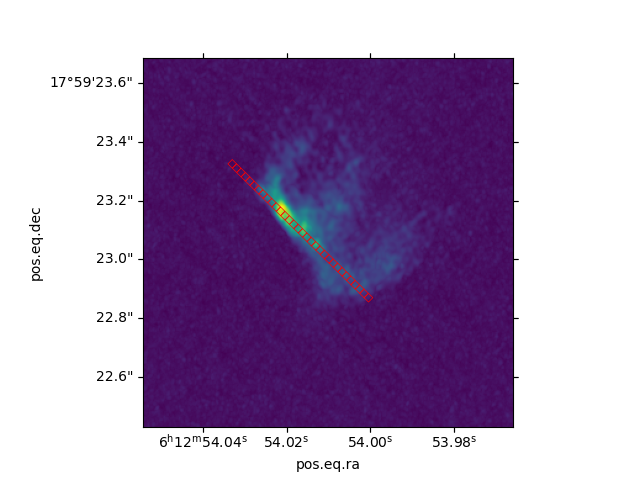

In [150]:
fig = pl.figure()
ax = fig.add_subplot(projection=cube.wcs.celestial)
ax.imshow(mx.value, origin='lower')
path.show_on_axis(ax, spacing=5, edgecolor='r', linewidth=0.5, )

In [151]:
vmax = siocube.with_mask(siocube>siocube.mad_std()*3).argmax_world(axis=0)
np.nanmedian(vmax)

<Quantity -8.42492772 km / s>

(75.0, 210.0, 75.0, 210.0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
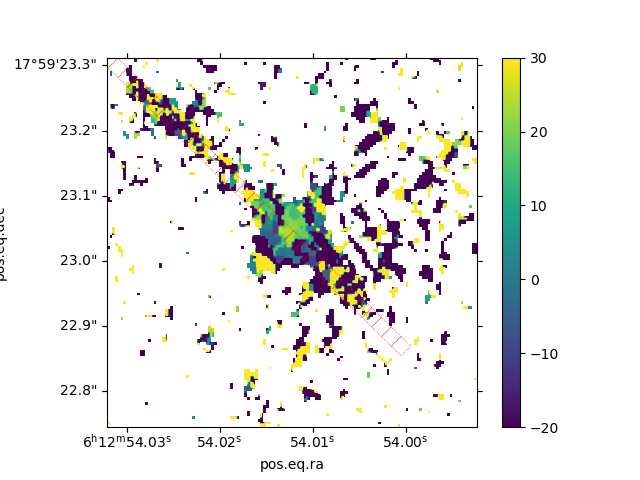

In [152]:
fig = pl.figure()
ax = fig.add_subplot(projection=cube.wcs.celestial)
im = ax.imshow(vmax.value, origin='lower', vmin=-20, vmax=30)
pl.colorbar(mappable=im)
path.show_on_axis(ax, spacing=5, edgecolor='r', linestyle=':', linewidth=0.5)
ax.axis([75,210,75,210])

In [106]:
pvdiagram = pvextractor.extract_pv_slice(cube, path, spacing=1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
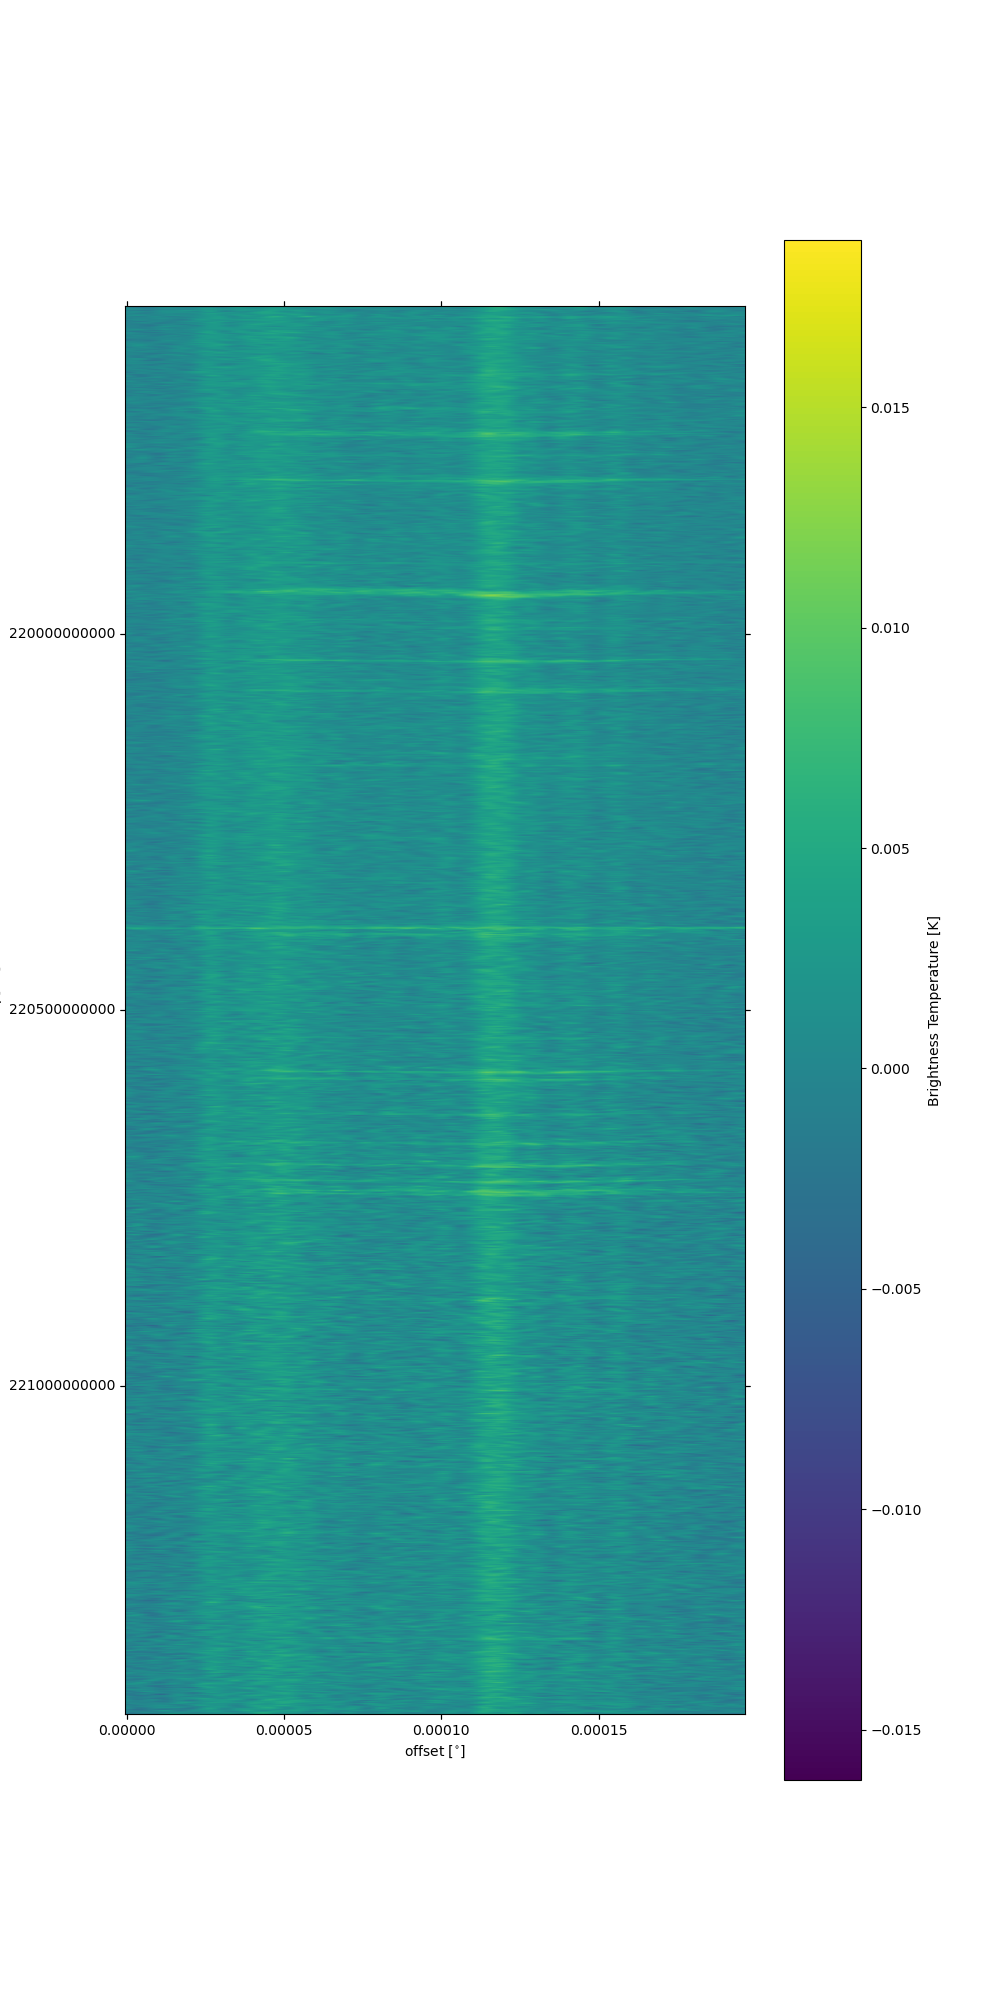

In [92]:
pl.figure(figsize=(10,20))
ax = pl.subplot(111, projection=wcs.WCS(pvdiagram.header))
im = ax.imshow(pvdiagram.data)
cb = pl.colorbar(mappable=im)
# we could specify the colorbar units like this:
# cb.set_label(cube.unit)
# but the 'BUNIT' keyword is not set for these data, so we don't know the unit.  We instead manually specify:
cb.set_label("Brightness Temperature [K]")
ax.set_aspect(0.2)

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:230: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
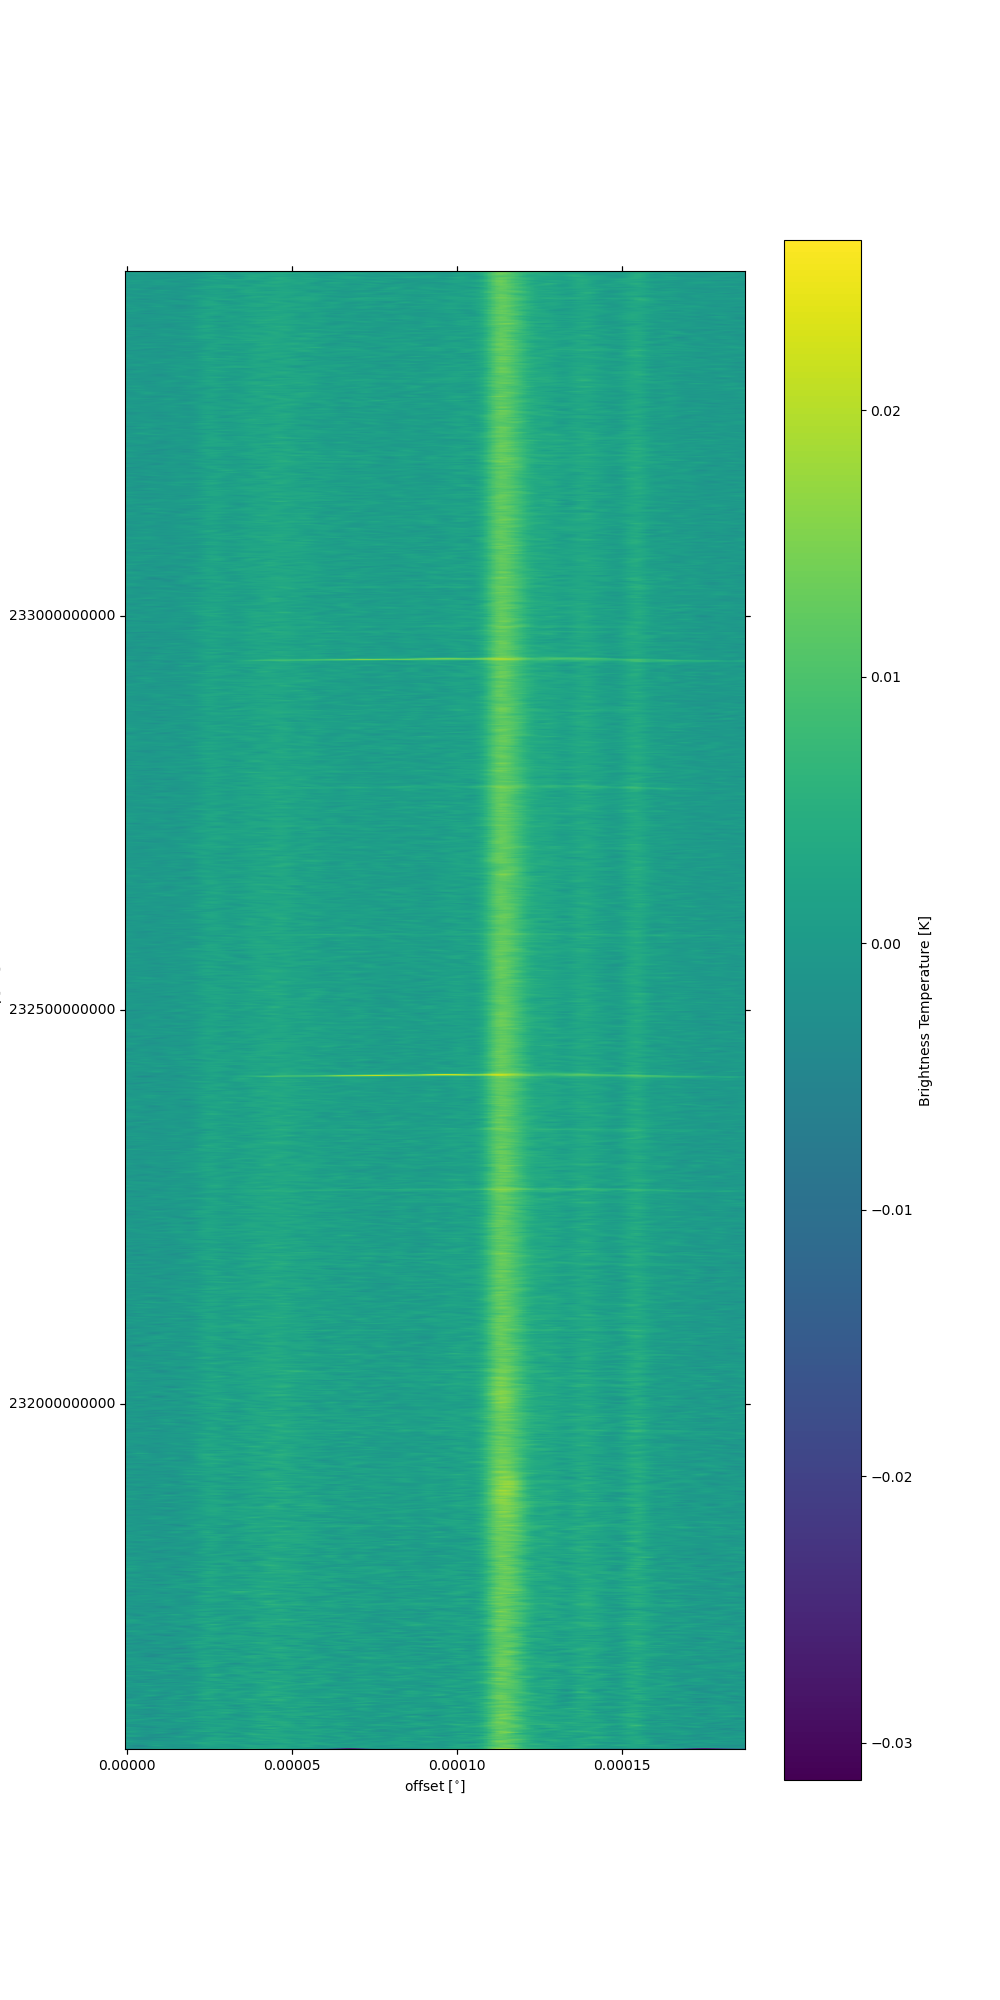

In [165]:
filename1 = '/orange/adamginsburg/salt/s255ir/imaging/S255IR-SMA1_sci.spw1.cube.I.zoom.manual.image.pbcor'
cube1 = SpectralCube.read(filename1, use_dask=True, format='casa_image')[:,100:-100,100:-100]
pvdiagram = pvextractor.extract_pv_slice(cube1, path, spacing=1)

pl.figure(figsize=(10,20))
ax = pl.subplot(111, projection=wcs.WCS(pvdiagram.header))
im = ax.imshow(pvdiagram.data)
cb = pl.colorbar(mappable=im)
# we could specify the colorbar units like this:
# cb.set_label(cube.unit)
# but the 'BUNIT' keyword is not set for these data, so we don't know the unit.  We instead manually specify:
cb.set_label("Brightness Temperature [K]")
ax.set_aspect(0.2)

In [187]:
watercube =  cube1.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=232.6867*u.GHz).spectral_slab(-50*u.km/u.s, 50*u.km/u.s) 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
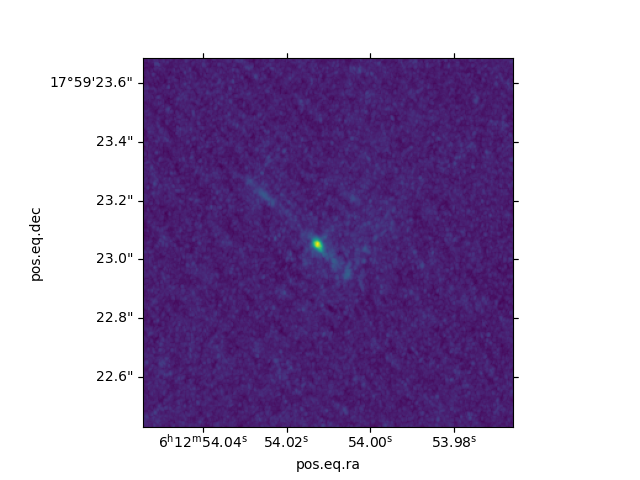

In [188]:
watermx = watercube.max(axis=0)
fig = pl.figure()
ax = fig.add_subplot(projection=cube1.wcs.celestial)
ax.imshow(watermx.value, origin='lower')
#path.show_on_axis(ax, spacing=5, edgecolor='r', linewidth=0.5, )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
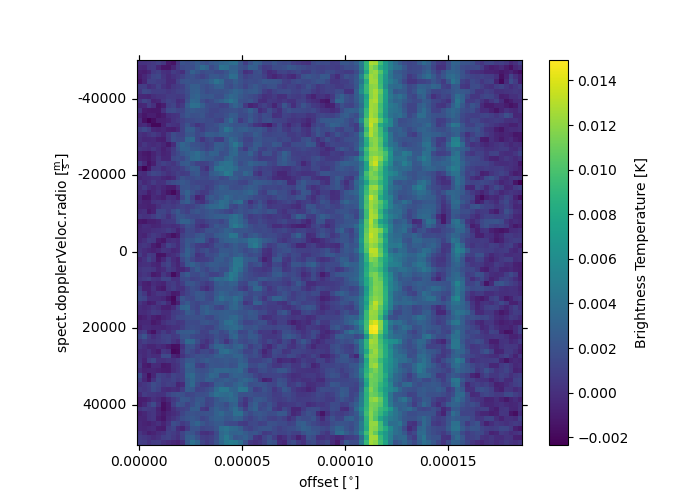

In [189]:
pvdiagram = pvextractor.extract_pv_slice(watercube, path, spacing=2)

pl.figure(figsize=(7,5))
ax = pl.subplot(111, projection=wcs.WCS(pvdiagram.header))
im = ax.imshow(pvdiagram.data)
cb = pl.colorbar(mappable=im)
# we could specify the colorbar units like this:
# cb.set_label(cube.unit)
# but the 'BUNIT' keyword is not set for these data, so we don't know the unit.  We instead manually specify:
cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(0.2)

In [179]:
h30acube = cube1.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=231.900928*u.GHz).spectral_slab(-50*u.km/u.s, 50*u.km/u.s)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
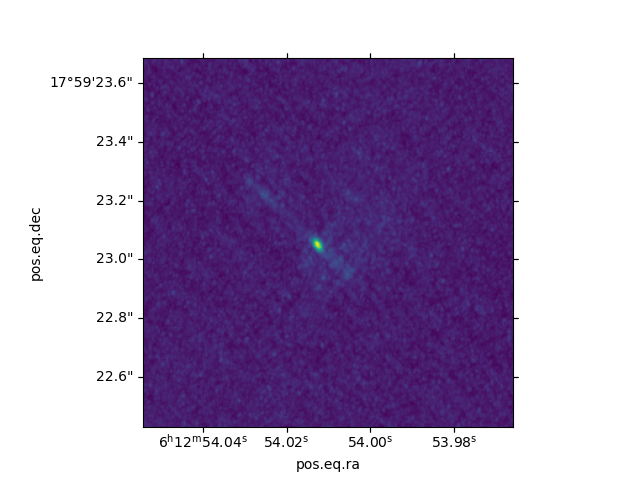

In [180]:
h30amx = h30acube.max(axis=0)
fig = pl.figure()
ax = fig.add_subplot(projection=cube1.wcs.celestial)
ax.imshow(h30amx.value, origin='lower')
#path.show_on_axis(ax, spacing=5, edgecolor='r', linewidth=0.5, )

/blue/adamginsburg/adamginsburg/repos/radio-beam/radio_beam/multiple_beams.py:265: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


(65.0, 210.0, 75.0, 220.0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
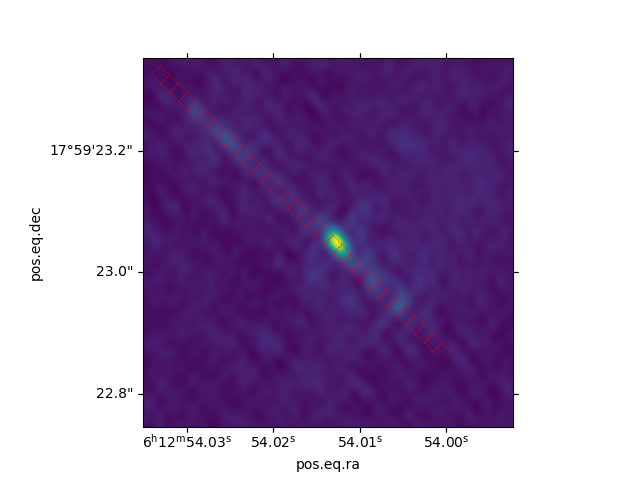

In [181]:
h30am0 = h30acube.moment0(axis=0)
fig = pl.figure()
ax = fig.add_subplot(projection=cube1.wcs.celestial)
ax.imshow(h30am0.value, origin='lower')
path.show_on_axis(ax, spacing=5, edgecolor='r', linestyle=':', linewidth=0.5, )
ax.axis([65,210,75,220])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
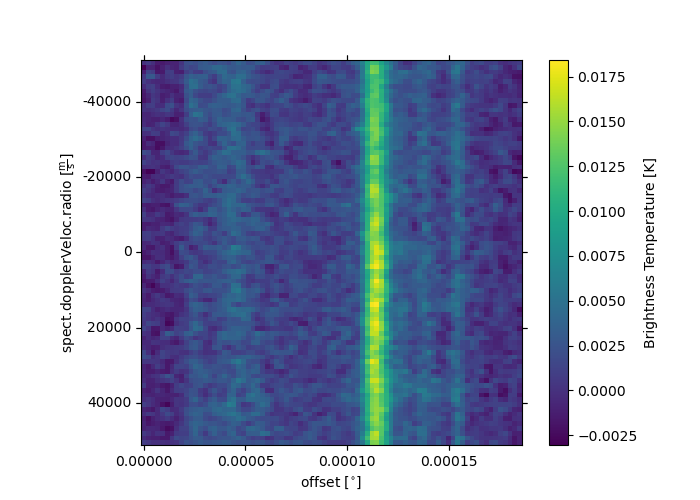

In [185]:
pvdiagram = pvextractor.extract_pv_slice(h30acube, path, spacing=2)

pl.figure(figsize=(7,5))
ax = pl.subplot(111, projection=wcs.WCS(pvdiagram.header))
im = ax.imshow(pvdiagram.data)
cb = pl.colorbar(mappable=im)
# we could specify the colorbar units like this:
# cb.set_label(cube.unit)
# but the 'BUNIT' keyword is not set for these data, so we don't know the unit.  We instead manually specify:
cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(0.2)

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:230: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
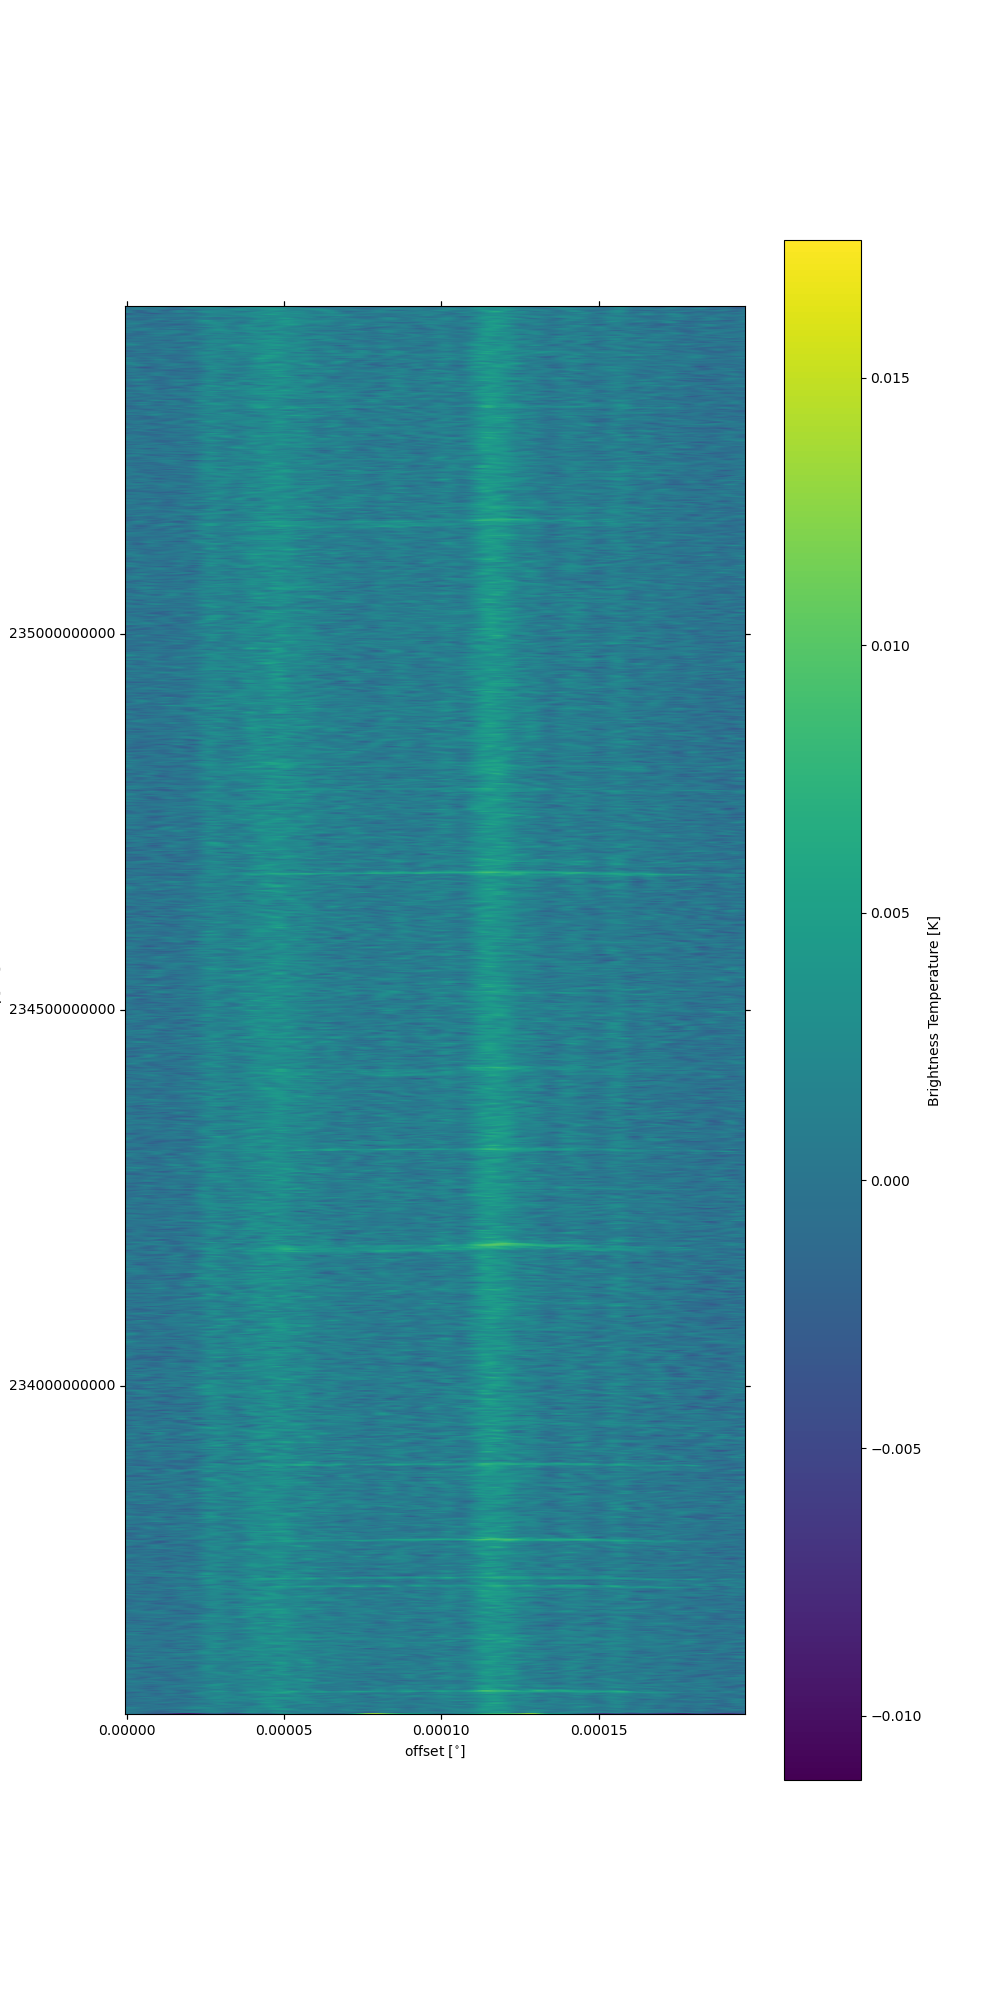

In [108]:
filename = '/orange/adamginsburg/salt/s255ir/imaging/S255IR-SMA1_sci.spw0.cube.I.zoom.manual.image.pbcor'
cube = SpectralCube.read(filename, use_dask=True, format='casa_image')[:,100:-100,100:-100]
pvdiagram = pvextractor.extract_pv_slice(cube, path, spacing=1)

pl.figure(figsize=(10,20))
ax = pl.subplot(111, projection=wcs.WCS(pvdiagram.header))
im = ax.imshow(pvdiagram.data)
cb = pl.colorbar(mappable=im)
# we could specify the colorbar units like this:
# cb.set_label(cube.unit)
# but the 'BUNIT' keyword is not set for these data, so we don't know the unit.  We instead manually specify:
cb.set_label("Brightness Temperature [K]")
ax.set_aspect(0.2)

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:230: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
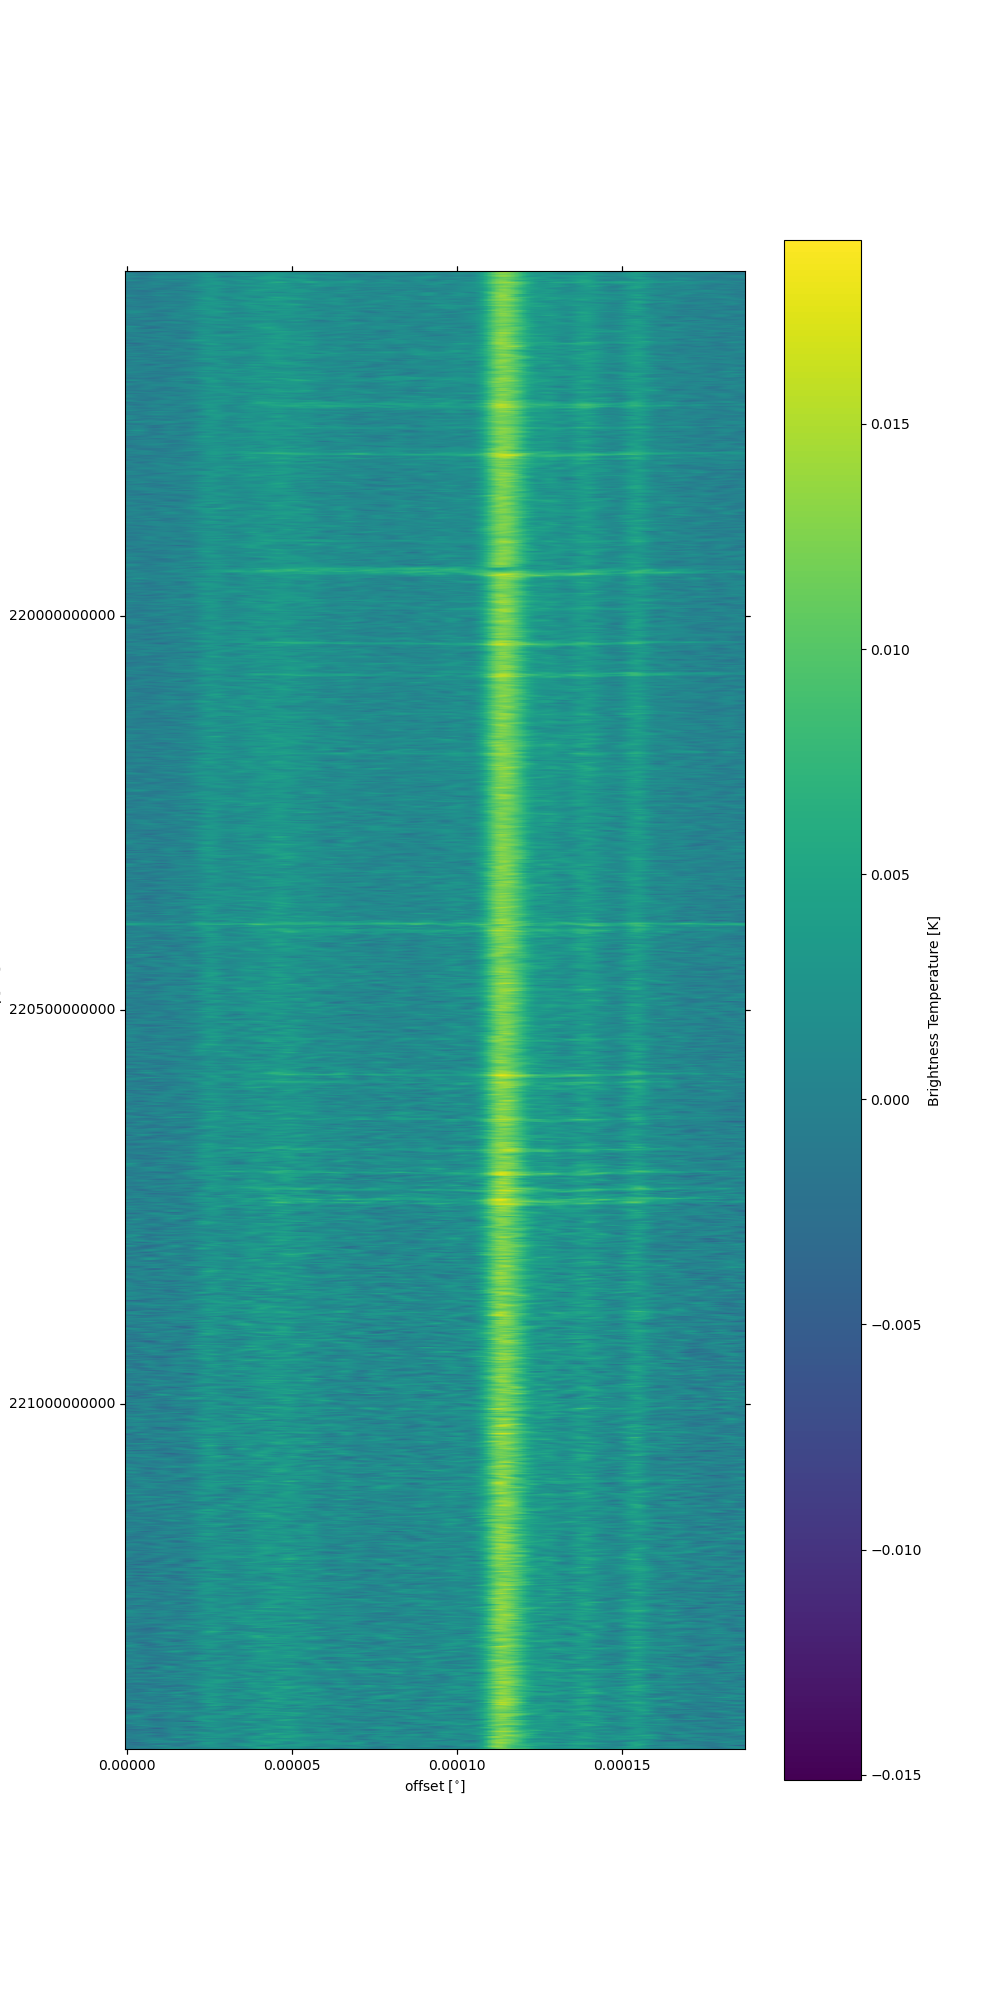

In [121]:
filename3 = '/orange/adamginsburg/salt/s255ir/imaging/S255IR-SMA1_sci.spw3.cube.I.zoom.manual.image.pbcor'
cube = SpectralCube.read(filename3, use_dask=True, format='casa_image')[:,100:-100,100:-100]
pvdiagram = pvextractor.extract_pv_slice(cube, path, spacing=1)

pl.figure(figsize=(10,20))
ax = pl.subplot(111, projection=wcs.WCS(pvdiagram.header))
im = ax.imshow(pvdiagram.data)
cb = pl.colorbar(mappable=im)
# we could specify the colorbar units like this:
# cb.set_label(cube.unit)
# but the 'BUNIT' keyword is not set for these data, so we don't know the unit.  We instead manually specify:
cb.set_label("Brightness Temperature [K]")
ax.set_aspect(0.2)

In [123]:
numax = siocube.with_mask(siocube>siocube.mad_std()*3).with_spectral_unit(u.GHz).argmax_world(axis=0)

(array([ 259.,  228.,  305.,  275.,  257.,  232.,  175.,  289.,  205.,
         254.,  295.,  375.,  289.,  315.,  248.,  274.,  250.,  243.,
         362.,  360.,  382.,  270.,  244.,  413.,  347.,  188.,  274.,
         316.,  229.,  281.,  267.,  261.,  297.,  178.,  278., 1135.,
         825.,  282.,  262.,  241.,  222.,  305.,  243.,  283.,  352.,
         278.,  270.,  336.,  233.,  265.]),
 array([217.03296443, 217.0358549 , 217.03874537, 217.04163584,
        217.04452631, 217.04741677, 217.05030724, 217.05319771,
        217.05608818, 217.05897865, 217.06186912, 217.06475958,
        217.06765005, 217.07054052, 217.07343099, 217.07632146,
        217.07921193, 217.0821024 , 217.08499286, 217.08788333,
        217.0907738 , 217.09366427, 217.09655474, 217.09944521,
        217.10233567, 217.10522614, 217.10811661, 217.11100708,
        217.11389755, 217.11678802, 217.11967848, 217.12256895,
        217.12545942, 217.12834989, 217.13124036, 217.13413083,
        217.1370213 , 21

217.13413082678716

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
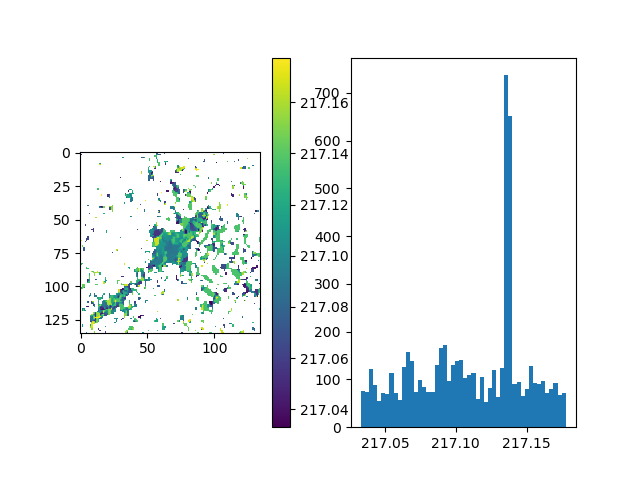

In [131]:
pl.figure()
im = pl.subplot(1,2,1).imshow(numax.value[75:210,75:210])
pl.colorbar(mappable=im)
h,l,p=pl.subplot(1,2,2).hist(numax[75:210,75:210].value.ravel(), bins=50)
l[h.argmax()]

In [168]:
restfreq = 216.945559*u.GHz # CH3OH 5(-1,4)-4(-2,3)E,vt=0
ch3ohcube = SpectralCube.read(filename2, use_dask=True, format='casa_image')[1825:1855,100:-100,100:-100]
numax = ch3ohcube.with_mask(ch3ohcube>ch3ohcube.mad_std()*3).with_spectral_unit(u.GHz).argmax_world(axis=0)

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:230: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


In [169]:
vmax_ch3oh = ch3ohcube.with_mask(ch3ohcube>ch3ohcube.mad_std()*3).with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=216.945559*u.GHz).argmax_world(axis=0)

4.127404919442117

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
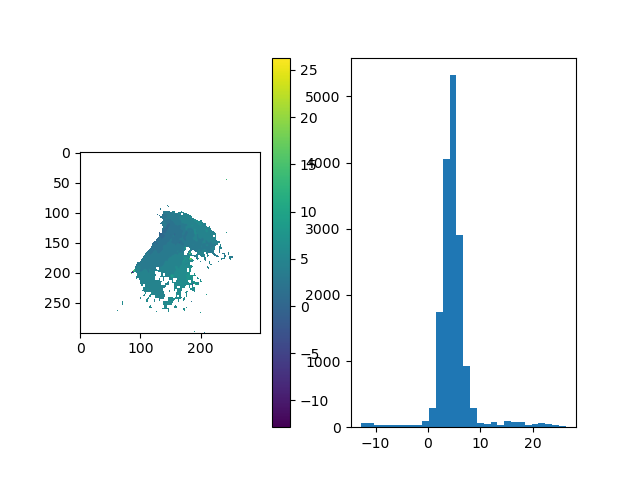

In [170]:
pl.figure()
im = pl.subplot(1,2,1).imshow(vmax_ch3oh.value)
pl.colorbar(mappable=im)
h,l,p=pl.subplot(1,2,2).hist(vmax_ch3oh.value.ravel(), bins=30)
l[h.argmax()]

In [161]:
from astroquery.splatalogue import Splatalogue
Splatalogue.query_lines(216.94144*u.GHz*(1-10/3e5), 216.94144*u.GHz*(1+10/3e5)).show_in_notebook()

In [164]:
Splatalogue.query_lines(216.14144*u.GHz, 236.94144*u.GHz, chemical_name='Hydrogen Recombination').show_in_notebook()

In [186]:
Splatalogue.query_lines(216.14144*u.GHz, 236.94144*u.GHz, chemical_name='Water').show_in_notebook()